In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import difflib

In [4]:
import re

In [6]:
food = pd.read_csv("food.csv")

In [7]:
food_nutrient = pd.read_csv('food_nutrient.csv')

In [8]:
food.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [9]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

In [11]:
food['Description'] = food['Description'].astype(str)

In [12]:
f'number of unique food items {pd.unique(food.iloc[:, 2]).size}'

'number of unique food items 7413'

In [55]:
nutrient = pd.read_csv('food_nutrient.csv')

In [14]:
food_nutrient.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [15]:
food_nutrient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [17]:
food_nutrient['Food'].unique()

array(["Cows' milk", 'Milk skim', 'Buttermilk', 'Evaporated, undiluted',
       'Fortified milk', 'Powdered milk', 'skim, instant',
       'skim, non-instant', "Goats' milk", '(1/2 cup ice cream)', 'Cocoa',
       'skim. milk', '(cornstarch)', 'Custard', 'Ice cream', 'Ice milk',
       'Cream or half-and-half', 'or whipping', 'Cheese', 'uncreamed',
       'Cheddar', 'Cheddar, grated cup', 'Cream cheese',
       'Processed cheese', 'Roquefort type', 'Swiss', 'Eggs raw',
       'Eggs Scrambled or fried', 'Yolks', 'Butter',
       'Hydrogenated cooking fat', 'Lard', 'Margarine',
       'Margarine, 2 pat or', 'Mayonnaise', 'Corn oil', 'Olive oil',
       'Safflower seed oil', 'French dressing', 'Thousand Island sauce',
       'Salt pork', 'Bacon', 'Beef', 'Hamburger', 'Ground lean',
       'Roast beef', 'Steak', 'Steak, lean, as round', 'Corned beef',
       'Corned beef hash canned', 'Corned beef hash Dried', 'Pot-pie',
       'Corned beef hash Stew', 'chicken',
       'Fried, breast or l

In [21]:
food_nutrient[food_nutrient['Food']=='Buttermilk']

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products


In [22]:
f'number of unique nutrients {pd.unique(food_nutrient.iloc[:, 2]).size}'

'number of unique nutrients 103'

In [23]:
nutrient.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


In [24]:
nutrient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


<AxesSubplot:xlabel='Grams', ylabel='count'>

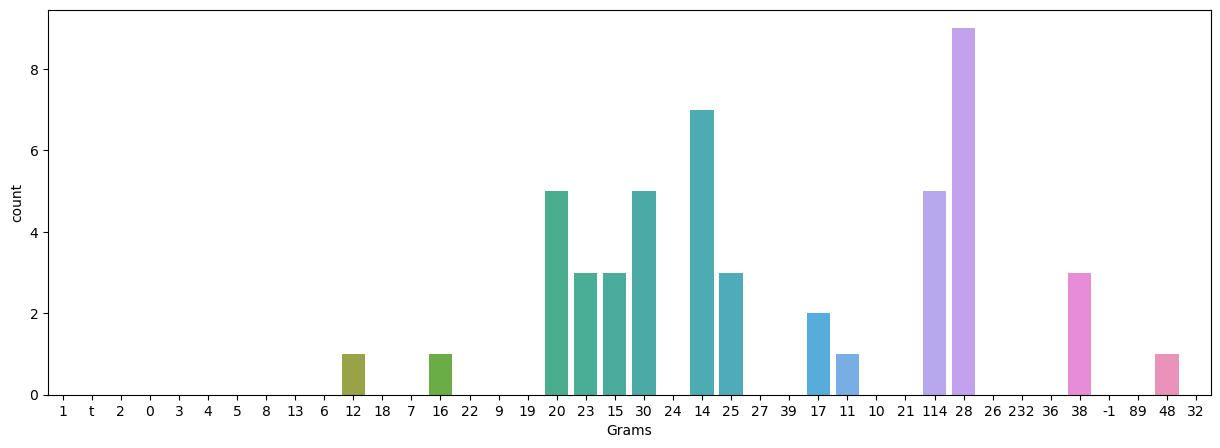

In [31]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Grams',
              data=nutrient,
              order=nutrient['Protein'].value_counts().index)


In [35]:
nutrients_with_names = nutrient.merge(food_nutrient.drop('Food', axis=1),
                                      left_on='Fat', 
                                      right_on='Protein')

In [36]:
nutrients_with_names.head()

,Food,Measure_x,Grams_x,Calories_x,Protein_x,Fat_x,Sat.Fat_x,Fiber_x,Carbs_x,Category_x,Measure_y,Grams_y,Calories_y,Protein_y,Fat_y,Sat.Fat_y,Fiber_y,Carbs_y,Category_y
0,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1T.,14,100,t,11,10,0,t,"Fats, Oils, Shortenings"
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1/2 cup,112,806,t,91,76,0,t,"Fats, Oils, Shortenings"
2,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1 T.,14,100,t,11,9,0,t,"Fats, Oils, Shortenings"
3,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1 T.,15,110,t,12,5,0,t,"Fats, Oils, Shortenings"
4,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1 T.,15,60,t,6,2,0,2,"Fats, Oils, Shortenings"


In [37]:
nutrients_with_names.shape

(7969, 19)

In [38]:
nutrients_with_names.isnull().sum()

Food           0
Measure_x      0
Grams_x        0
Calories_x    39
Protein_x      0
Fat_x          0
Sat.Fat_x     24
Fiber_x        0
Carbs_x        0
Category_x     0
Measure_y      0
Grams_y        0
Calories_y     8
Protein_y      0
Fat_y          0
Sat.Fat_y     15
Fiber_y        0
Carbs_y        0
Category_y     0
dtype: int64

In [39]:
nutrients_with_names.head()

,Food,Measure_x,Grams_x,Calories_x,Protein_x,Fat_x,Sat.Fat_x,Fiber_x,Carbs_x,Category_x,Measure_y,Grams_y,Calories_y,Protein_y,Fat_y,Sat.Fat_y,Fiber_y,Carbs_y,Category_y
0,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1T.,14,100,t,11,10,0,t,"Fats, Oils, Shortenings"
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1/2 cup,112,806,t,91,76,0,t,"Fats, Oils, Shortenings"
2,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1 T.,14,100,t,11,9,0,t,"Fats, Oils, Shortenings"
3,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1 T.,15,110,t,12,5,0,t,"Fats, Oils, Shortenings"
4,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products,1 T.,15,60,t,6,2,0,2,"Fats, Oils, Shortenings"


In [40]:
nutrients_with_names = nutrients_with_names[['Food', 'Calories_x', 'Fiber_y', 'Fat_y', 'Carbs_y']]

In [50]:
nutrients_with_names.isnull().sum()

Food           0
Calories_x    39
Fiber_y        0
Fat_y          0
Carbs_y        0
dtype: int64

In [54]:
df = pd.read_csv("food_nutrient.csv")
df

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [61]:
vitamins = ['Vitamin A, RAE', 'Thiamin', 'Riboflavin', 'Niacin', 'Pantothenic acid', 'Vitamin B-6', 'Biotin', 'Folate, total', 'Vitamin B-12',
 'Vitamin C, total ascorbic acid', 'Vitamin D (D2 + D3)', 'Vitamin D2 (ergocalciferol)', 'Vitamin D3 (cholecalciferol)', 'Vitamin E (alpha-tocopherol)', 
 'Vitamin K (Dihydrophylloquinone)', 'Vitamin K (Menaquinone-4)', 'Vitamin K (phylloquinone)']

In [62]:
minerals = ['Potassium, K', 'Sodium, Na', 'Calcium, Ca', 'Phosphorus, P', 'Magnesium, Mg', 'Iron, Fe', 'Zinc, Zn', 'Manganese, Mn',
             'Copper, Cu', 'Iodine, I', 'Selenium, Se', 'Molybdenum, Mo', 'Cobalt, Co', 'Nickel, Ni', 'Boron, B']

In [68]:
r = re.compile("Choline")

In [79]:
nutrient.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products


<AxesSubplot:xlabel='Grams', ylabel='count'>

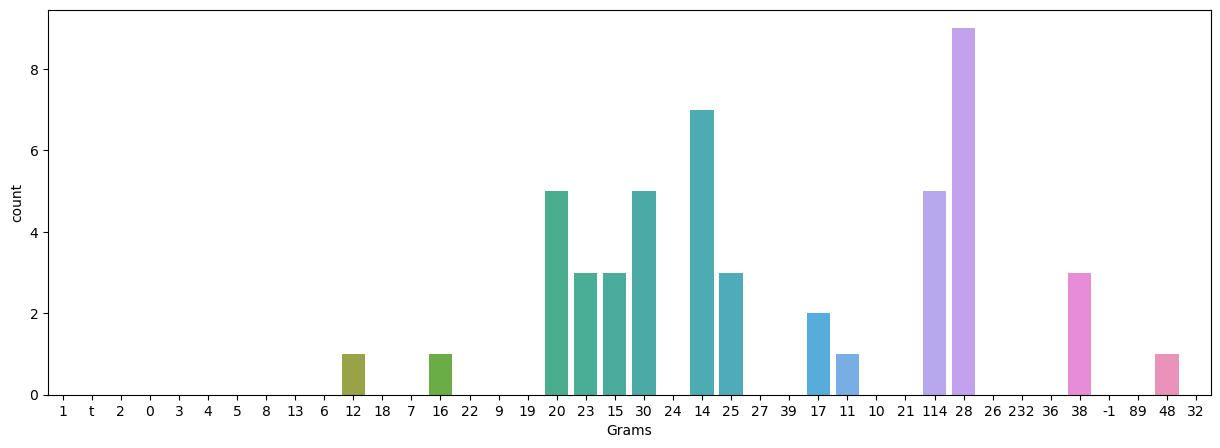

In [82]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Grams', data=nutrient, 
              order=nutrient['Protein'].value_counts().index)

In [83]:
nutrients_with_names.head()

,Food,Calories_x,Fiber_y,Fat_y,Carbs_y
0,Milk skim,360,0,11,t
1,Milk skim,360,0,91,t
2,Milk skim,360,0,11,t
3,Milk skim,360,0,12,t
4,Milk skim,360,0,6,2


In [84]:
nutrients = pd.unique(df['Food'])
sorted(nutrients)

['(1/2 cup ice cream)',
 '(cornstarch)',
 '3 teaspoons sugar',
 '9" diam. pie',
 'Almonds',
 'Apple betty',
 'Apple juice canned',
 'Apple vinegar',
 'Apples, raw',
 'Apricots',
 'Artichoke',
 'Asparagus',
 'Avocado',
 'Bacon',
 'Baked with cheese',
 'Banana',
 'Bean soups',
 'Bean sprouts',
 'Beans',
 'Beef',
 'Beef soup',
 'Beer',
 'Beet greens',
 'Beetroots',
 'Biscuits',
 'Blackberries',
 'Blueberries',
 'Bouillon',
 'Bran flakes',
 'Brazil nuts',
 'Bread pudding',
 'Bread, cracked wheat',
 'Broccoli',
 'Brown, firm-packed, dark sugar',
 'Brussels sprouts',
 'Butter',
 'Buttermilk',
 'Cakes',
 'Candied',
 'Candy',
 'Cane Syrup',
 'Cantaloupe',
 'Carbonated drinks Artificially sweetened',
 'Carrots',
 'Cashews',
 'Cauliflower',
 'Celery',
 'Chard steamed',
 'Cheddar',
 'Cheddar, grated cup',
 'Cheese',
 'Cherries',
 'Cherry Pie',
 'Chicken livers, fried',
 'Chocolate creams',
 'Chocolate fudge',
 'Chocolate syrup',
 'Clam chowder',
 'Clams',
 'Club soda',
 'Cocoa',
 'Cod',
 'Coffee'

In [85]:
f'number of unique nutrient names {nutrients.size}'

'number of unique nutrient names 329'

In [88]:
matches = difflib.get_close_matches('vitamin D', nutrients, n=15, cutoff=.2)
matches

['Salmon',
 'Pumpkin Pie',
 'Farina',
 '9" diam. pie',
 'Raisins',
 'skim, instant',
 'Sardines',
 'Ham, as ',
 'Split-pea soup',
 'Tapioca cream pudding',
 'Steamed cabbage',
 'Stalk raw',
 'Margarine',
 'Gin',
 'Turnips, steamed']

In [89]:
set(filter(r.match, nutrients))

set()